Taken from https://docs.scvi-tools.org/en/stable/tutorials/notebooks/harmonization.html

In [1]:
import scanpy as sc
import scvi

sc.set_figure_params(dpi=100, frameon=False, color_map='Reds')
sc.logging.print_header()

Global seed set to 0
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.1 pandas==1.4.4 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.10.2 pynndescent==0.5.7


/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [15]:
adata = sc.read('/lustre/groups/ml01/workspace/yuge.ji/covid-perturbation/data/210118_annot_patient_all.h5ad')
adata

/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/anndata/_io/h5ad.py:238: OldFormatWarning: Element '/layers' was written without encoding metadata.
  d[k] = read_elem(f[k])
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/anndata/_io/specs/methods.py:584: OldFormatWarning: Element '/obs/__categories/identifier' was written without encoding metadata.
  categories = read_elem(categories_dset)
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/anndata/_io/specs/methods.py:587: OldFormatWarning: Element '/obs/identifier' was written without encoding metadata.
  read_elem(dataset), categories, ordered=ordered
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/anndata/_io/specs/methods.py:584: OldFormatWarning: Element '/obs/__categories/patient' was written without encoding metadata.
  categories = read_elem(categories_dset)
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/an

/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/anndata/_io/h5ad.py:238: OldFormatWarning: Element '/obsm' was written without encoding metadata.
  d[k] = read_elem(f[k])
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/anndata/_io/specs/methods.py:92: OldFormatWarning: Element '/obsm/X_pca' was written without encoding metadata.
  return {k: read_elem(v) for k, v in elem.items()}
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/anndata/_io/specs/methods.py:92: OldFormatWarning: Element '/obsm/X_umap' was written without encoding metadata.
  return {k: read_elem(v) for k, v in elem.items()}
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/var/_index' was written without encoding metadata.
  return read_elem(dataset)


AnnData object with n_obs × n_vars = 300353 × 18115
    obs: 'identifier', 'patient', 'name', 'barcode_round', 'sample', 'viral_counts', 'treatment', 'treatment_virus', 'infected', 'n_counts', 'n_genes', 'percent_mito', 'percent_viral', 'leiden', 'final_bcs', 'batch', 'celltype_coarse', 'cell_type', 'infection_label'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts'

## Integrating private dataset - mock only

In [18]:
adata = adata[adata.obs.treatment == 'mock']
adata.obs.patient.value_counts()

patient_3    10670
patient_4     8226
patient_1     7297
patient_2     5059
Name: patient, dtype: int64

In [4]:
# retain full dataset
subset = adata.copy()

In [5]:
sc.pp.highly_variable_genes(
    subset,
    n_top_genes=2000,
    batch_key="patient",
    subset=True
)

/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/

In [6]:
scvi.model.SCVI.setup_anndata(subset, layer="counts", batch_key="patient")

In [7]:
vae = scvi.model.SCVI(subset, n_layers=2, n_latent=30)

In [8]:
vae.train()

/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/torch/distributed/_sharded_tensor/__init__.py:8: DeprecationWarning: torch.distributed._sharded_tensor will be deprecated, use torch.distributed._shard.sharded_tensor instead
  warnings.warn(
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (ElboMetric). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_full_state_property`
                that can be used to check if the `full_state_update=True` (old and potential slower be

Epoch 256/256: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 256/256 [09:06<00:00,  2.14s/it, loss=650, v_num=1]


In [19]:
adata.obsm["X_scVI"] = vae.get_latent_representation()

In [21]:
%%time
sc.pp.neighbors(adata, use_rep="X_scVI")
sc.tl.leiden(adata)
sc.tl.umap(adata)

CPU times: user 47.7 s, sys: 3.34 s, total: 51 s
Wall time: 41.7 s


In [25]:
import math
import pandas as pd
adata.obs['infected'] = ['sars-cov-2' in s if not pd.isnull(s) else math.nan for s in adata.obs.treatment_virus.values]
adata.obs['infected'] = adata.obs['infected'].astype(str)

/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:163: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` instead.
  cmap = copy(get_cmap(cmap))
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/

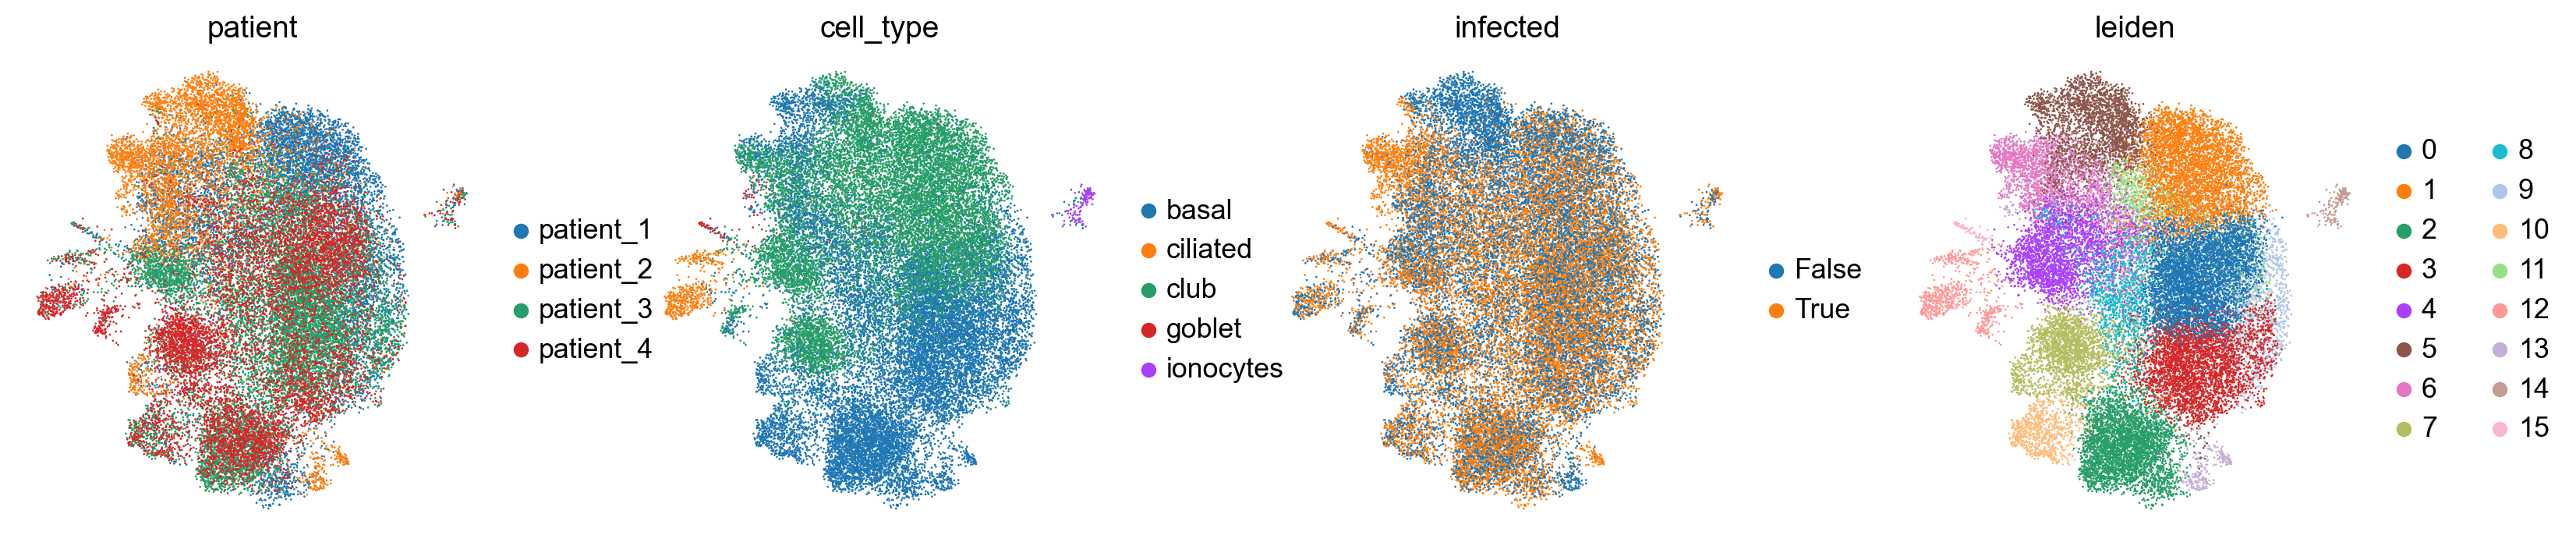

In [27]:
sc.pl.umap(adata, color=['patient', 'cell_type', 'infected', 'leiden'])

#### Saving

In [30]:
adata

AnnData object with n_obs × n_vars = 31252 × 18115
    obs: 'identifier', 'patient', 'name', 'barcode_round', 'sample', 'viral_counts', 'treatment', 'treatment_virus', 'infected', 'n_counts', 'n_genes', 'percent_mito', 'percent_viral', 'leiden', 'final_bcs', 'batch', 'celltype_coarse', 'cell_type', 'infection_label'
    uns: 'neighbors', 'leiden', 'umap', 'patient_colors', 'cell_type_colors', 'infected_colors', 'leiden_colors'
    obsm: 'X_pca', 'X_umap', 'X_scVI'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [26]:
adata.write('211001_annot_patient_integrated_mock.h5ad')

In [29]:
vae.save('2021-10-10_scvi_vae_patient_batchcorr_mock', overwrite=True)